### Codio Activity 9.4: Comparing the Ridge to Ordinarily Least Squares (OLS)

**Expected Time: 30 Minutes**

**Total Points: 30**

This activity focuses on comparing the models resulting from a `LinearRegression` model compared to a low penalty and high penalty `Ridge` model.  A synthetic polynomial dataset is used to compare the resulting models shapes.  You are to pay attention to the resulting complexity and size of the coefficients as the amount of regularization changes. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/synthetic_9.4.csv")

In [3]:
X, y = data[["x"]], data["y"]

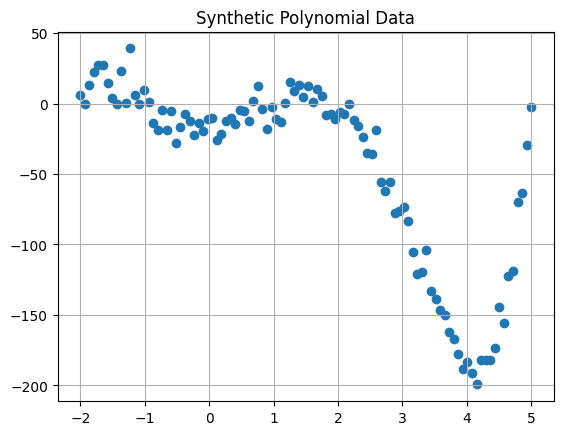

In [4]:
plt.scatter(X, y)
plt.title("Synthetic Polynomial Data")
plt.grid()

### Problem 1

#### Polynomial Features and Linear Regression Pipeline

**10 Points**

To begin, you are to construct a `Pipeline` object that has steps `poly_features` and `linreg` that generate `degree = 5` polynomial features with `include_bias = False` and uses a `LinearRegression` estimator with default settings.  Assign your pipeline to `ols_pipe` below, and after fitting on the entire `X` dataset assign the array of predictions for all of `X` to `ols_preds` below.

In [5]:
ols_pipe = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("linreg", LinearRegression()),
    ]
).fit(X, y)
ols_preds = ols_pipe.predict(X)

# Answer chec
ols_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linreg', LinearRegression())])

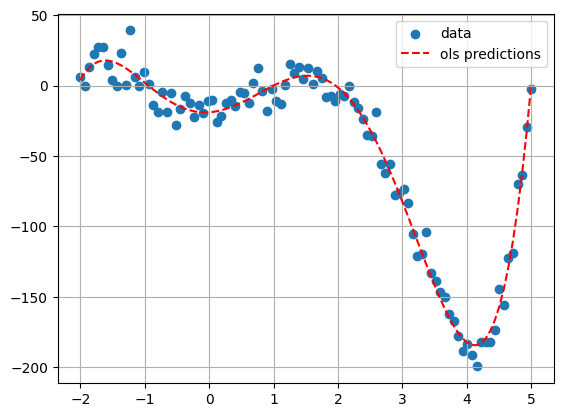

In [6]:
Xnp = X.to_numpy()
plt.scatter(Xnp, y, label="data")
plt.plot(Xnp, ols_preds, "r--", label="ols predictions")
plt.legend()
plt.grid()

### Problem 2

#### Ridge model with small regularization penalty

**10 Points**

Now, construct a pipeline with named steps `poly_features` and `ridge_low` that again generates `degree = 5` polynomial features and fits a `Ridge` regression model with `alpha = 0.1`.  Assign the pipeline to `ridge_low_pipe` and the predictions to `ridge_low_preds`.  

In [7]:
ridge_low_pipe = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("ridge_low", Ridge(alpha=0.1)),
    ]
).fit(X, y)
ridge_low_preds = ridge_low_pipe.predict(X)

# Answer check
ridge_low_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_low', Ridge(alpha=0.1))])

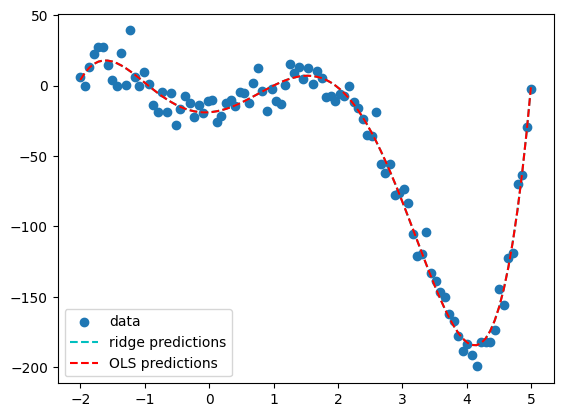

In [8]:
Xnp = X.to_numpy()
plt.scatter(Xnp, y, label="data")
plt.plot(Xnp, ridge_low_preds, "--c", label="ridge predictions")
plt.plot(Xnp, ols_preds, "--r", label="OLS predictions")
plt.legend()

### Problem 3

#### High Regularization Ridge 

**10 Points**

Finally, build a pipeline named `ridge_high_pipe` that contains named steps `poly_features` and `ridge_high` with `degree = 5`, `include_bias = False`, and `alpha = 1000` respectively.  Assign your predictions to `high_reg_preds`. 

In [9]:
ridge_high_pipe = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("ridge_high", Ridge(alpha=1000)),
    ]
).fit(X, y)
ridge_high_preds = ridge_high_pipe.predict(X)

# Answer check
ridge_high_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_high', Ridge(alpha=1000))])

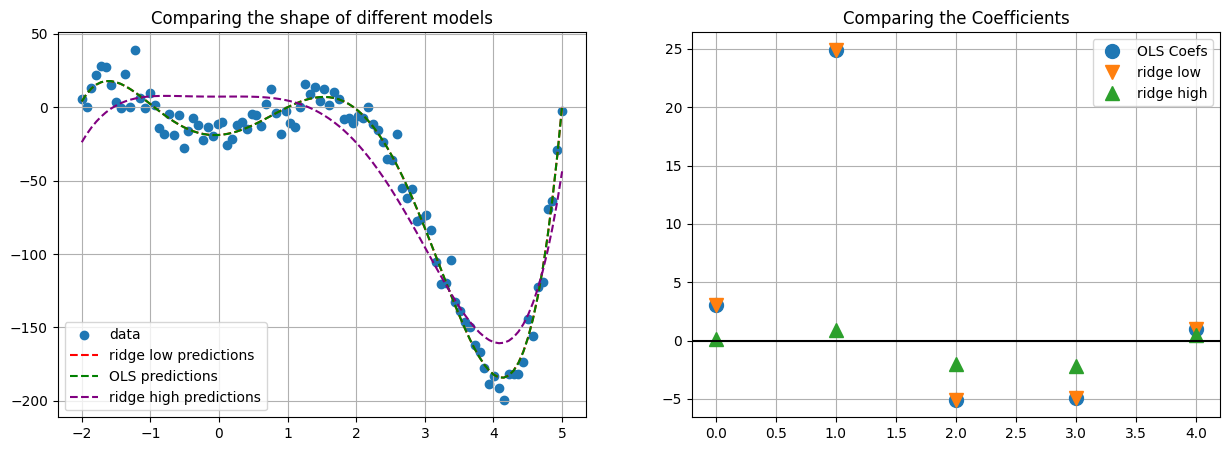

In [10]:
Xnp = X.to_numpy()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(Xnp, y, label="data")
ax[0].plot(Xnp, ridge_low_preds, "--r", label="ridge low predictions")
ax[0].plot(Xnp, ols_preds, "--g", label="OLS predictions")
ax[0].plot(Xnp, ridge_high_preds, "--", color="purple", label="ridge high predictions")
ax[0].set_title("Comparing the shape of different models")
ax[0].legend()
ax[0].grid()
ax[1].plot(ols_pipe.named_steps["linreg"].coef_, "o", markersize=10, label="OLS Coefs")
ax[1].plot(
    ridge_low_pipe.named_steps["ridge_low"].coef_, "v", markersize=10, label="ridge low"
)
ax[1].plot(
    ridge_high_pipe.named_steps["ridge_high"].coef_,
    "^",
    markersize=10,
    label="ridge high",
)
ax[1].legend()
ax[1].axhline(color="black")
ax[1].grid()
ax[1].set_title("Comparing the Coefficients")